In [59]:
from utils import LDA

/home/israel/repos/venvs/oak-gen2/lib/python3.8/site-packages/sklearn/base.py:310: UserWarning: Trying to unpickle estimator LinearDiscriminantAnalysis from version 0.22.2.post1 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(
/home/israel/repos/venvs/oak-gen2/lib/python3.8/site-packages/sklearn/base.py:310: UserWarning: Trying to unpickle estimator StandardScaler from version 0.22.2.post1 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(
/home/israel/repos/venvs/oak-gen2/lib/python3.8/site-packages/sklearn/base.py:310: UserWarning: Trying to unpickle estimator PCA from version 0.22.2.post1 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(


In [57]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os

In [63]:
path = 'recognition/test/'
files = os.listdir(path)

images = []
for file in files:
    img_path = os.path.join(path, file)
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    images.append(img)

In [64]:
images[0].shape

(184, 76)

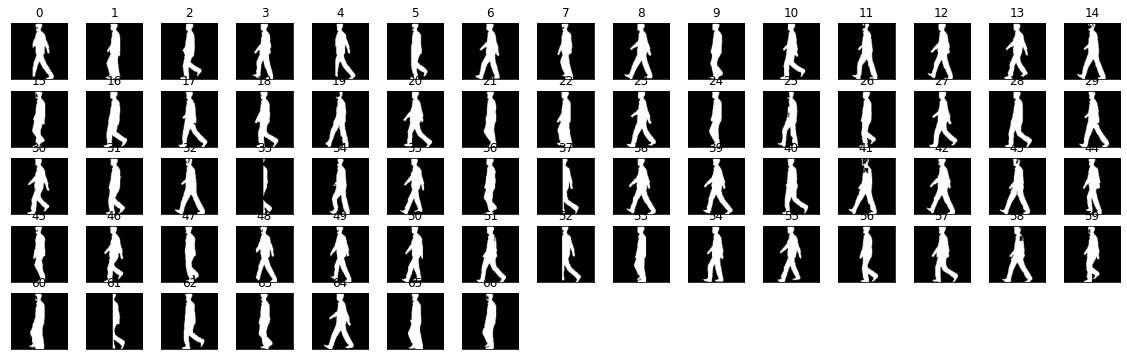

In [67]:
GEI, _ = LDA.GEI_generator(images, 100, True)

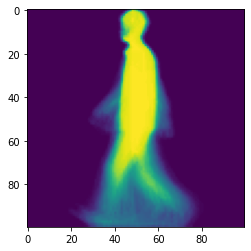

In [66]:
plt.imshow(GEI)

In [52]:
def GEI_generator(sil_file, size = 64,debug = False):
    lfiles = os.listdir(sil_file)
    lfiles.sort()
    stack_GEI = []
    if debug:
        plt.figure(figsize=(20,int(len(lfiles)/10)))
    for idimg, path in enumerate(lfiles):
        if debug: 
            plt.subplot((len(lfiles)/15)+1,15, idimg+1)
        img = cv2.imread(sil_file+path, 0)
        # Silhouette extraction
        contours1,_ = cv2.findContours(img.copy(),cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        cv2.drawContours(img,contours1,-1,255,-1)

        if (len(contours1)>0):
            ncoun= np.concatenate(contours1)[:,0,:]
            x1, y1 = np.min(ncoun,axis=0)
            x2, y2 = np.max(ncoun,axis=0)
            silhouette = img[y1:y2,x1:x2]

            # Normalizae silhouette
            factor = size/max(silhouette.shape)
            height = round(factor*silhouette.shape[0])
            width = round(factor*silhouette.shape[1])
            if(height>width):
                nor_sil = cv2.resize(silhouette,(width,height))
                #         print(nor_sil.shape)
                # We add a background of the shape size x size
                portion_body = 0.3                                                      # We take the upper part of the body to center the image and avoid the legs
                moments = cv2.moments(nor_sil[0:int(nor_sil.shape[0]*portion_body),])
                w = round(moments['m10']/moments['m00'])
                background = np.zeros((size, size))
                shift = round((size/2)-w)
                #         print('center:',w,' shift:',shift)
                if(shift<0 or shift+nor_sil.shape[1]>size): 
                    shift = round((size-nor_sil.shape[1])/2)
                background[:,shift:nor_sil.shape[1]+shift] = nor_sil

                stack_GEI.append(background)
                if debug:
                    plt.xticks([])
                    plt.yticks([])
                    plt.imshow(background,'gray')
                    plt.title(str(idimg))
                    # plt.subplots_adjust(wspace=0.05, hspace=0.01)
    if stack_GEI == []:
        GEI = np.zeros((size, size))
        print('\tNo Files Found')
    else: 
        GEI = np.mean(np.array(stack_GEI),axis=0)

    return GEI, stack_GEI

In [56]:
plt.imshow(background)

NameError: name 'background' is not defined

<ipython-input-52-703980e0d28d>:9: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot((len(lfiles)/15)+1,15, idimg+1)


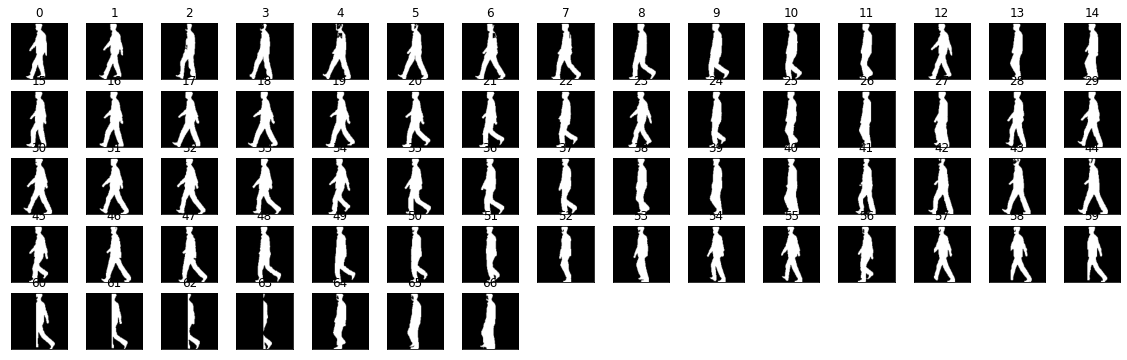

In [53]:
GEI, _ = GEI_generator(path, 100, True)

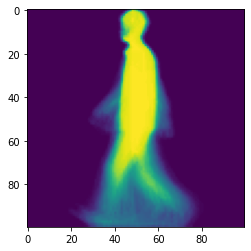

In [49]:
plt.imshow(GEI)

In [43]:
from pickle import load
# import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
model = load(open('recognition/model.pkl', 'rb'))
scaler = load(open('recognition/scaler.pkl', 'rb'))
pca = load(open('recognition/pca.pkl', 'rb'))

/home/israel/repos/venvs/oak-gen2/lib/python3.8/site-packages/sklearn/base.py:310: UserWarning: Trying to unpickle estimator LinearDiscriminantAnalysis from version 0.22.2.post1 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(
/home/israel/repos/venvs/oak-gen2/lib/python3.8/site-packages/sklearn/base.py:310: UserWarning: Trying to unpickle estimator StandardScaler from version 0.22.2.post1 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(
/home/israel/repos/venvs/oak-gen2/lib/python3.8/site-packages/sklearn/base.py:310: UserWarning: Trying to unpickle estimator PCA from version 0.22.2.post1 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(


In [51]:
flatten = GEI.flatten()[np.newaxis]
scaled = scaler.transform(flatten)
norm = pca.transform(scaled)
model.predict(norm)

array([1.])

In [13]:
bsub = cv2.createBackgroundSubtractorMOG2()

In [3]:
cap.set(cv2.CAP_PROP_POS_MSEC, 3000)

True

In [4]:
ret, frame = cap.read()

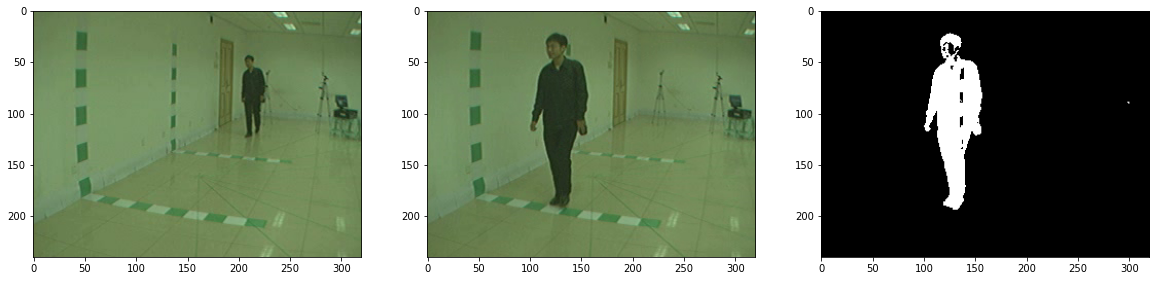

In [5]:
diff = cv2.subtract(background, frame)
diff_gray = cv2.cvtColor(diff, cv2.COLOR_BGR2GRAY)
_, diff_gray = cv2.threshold(diff_gray, 40, 255, cv2.THRESH_BINARY)
plt.figure(figsize=(20,10))
plt.subplot(131); plt.imshow(background[:,:,::-1]);
plt.subplot(132); plt.imshow(frame[:,:,::-1]);
plt.subplot(133); plt.imshow(diff_gray, 'gray');

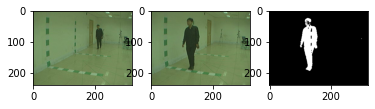

In [9]:
plt.subplot(131); plt.imshow(background[:,:,::-1]);
plt.subplot(132); plt.imshow(frame[:,:,::-1]);
plt.subplot(133); plt.imshow(difference, 'gray');

In [11]:
while(cap.isOpened()):
    # Capture frame-by-frame
    ret, frame = cap.read()
    if ret == True:
        fgMask = bsub.apply(frame)
        cv2.imshow('Frame',frame)
        cv2.imshow('mask', fgMask)

        # Press esc on keyboard to  exit
        if cv2.waitKey(25) & 0xFF == 27:
            break

    # Break the loop
    else:
        break

cv2.destroyAllWindows()
cap.release()

In [ ]:
import sys
from PIL import Image
from openvino_person_detection_retail import InferenceModel  # import the AI Model
from modelplace_api import Device

In [ ]:
model = InferenceModel()  # Initialize a model
model.model_load(Device.cpu)  # Loading a model weights
def run_model(path_to_image: str):
    image = Image.open(path_to_image).convert("RGB")  # Read an image
    ret = model.process_sample(image)  # Processing an image
    return ret

In [ ]:
output = run_model('image.png')
plt.imshow(output)

In [ ]:
for out in output:
    print(out)

In [1]:
import os
import sys
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import cv2

In [2]:
videos = ['left.mp4', 'color.mp4', 'right.mp4']
directory = ''

In [61]:
frames = []
caps = []
delay = 100
settime = 2008000
for video in videos:
    cap = cv2.VideoCapture(os.path.join(directory, video))
    if video == 'color.mp4':
        cap.set(cv2.CAP_PROP_POS_MSEC, settime+delay)
    else:
        cap.set(cv2.CAP_PROP_POS_MSEC, settime)
    # print(cap.get(cv2.CAP_PROP_FPS))
    ret, frame = cap.read()
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    frames.append(frame)

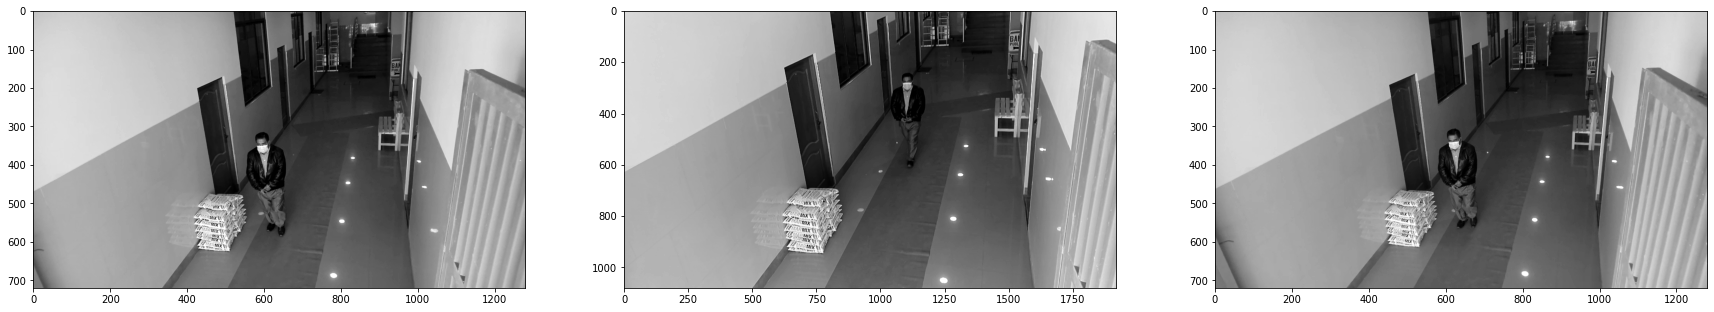

In [63]:
plt.figure(figsize=(30, 10))
# plt.subplot(131); plt.imshow(frames[0][:,:,::-1])
# plt.subplot(132); plt.imshow(frames[1][:,:,::-1])
# plt.subplot(133); plt.imshow(frames[2][:,:,::-1])

plt.subplot(131); plt.imshow(frames[0], 'gray')
plt.subplot(132); plt.imshow(frames[1], 'gray')
plt.subplot(133); plt.imshow(frames[2], 'gray')

In [40]:
orb = cv2.ORB_create(5000)
matcher  = cv2.DescriptorMatcher_create(cv2.DescriptorMatcher_BRUTEFORCE_HAMMINGLUT)

def drawMatches(src, dst, draw=False, warp=False):
    kp1, dst1 = orb.detectAndCompute(src, None)
    kp2, dst2 = orb.detectAndCompute(dst, None)

    matches = matcher.match(dst1, dst2)
    matches = sorted(matches, key = lambda x:x.distance)
    matches = matches[:int(len(matches)*0.15)]
    if draw:
        out = cv2.drawMatches(src, kp1, dst, kp2, matches, None)
        plt.figure(figsize=(20,20))
        plt.imshow(out),plt.show()
        plt.show()

    if warp:
        src_pts  = np.float32([kp1[m.queryIdx].pt for m in matches]).reshape(-1,1,2)
        dst_pts  = np.float32([kp2[m.trainIdx].pt for m in matches]).reshape(-1,1,2)

    # Calculate Homography
    h, status = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC)

    # Warp source image to destination based on homography
    out = cv2.warpPerspective(src, h, (dst.shape[1], dst.shape[0]))

    return out

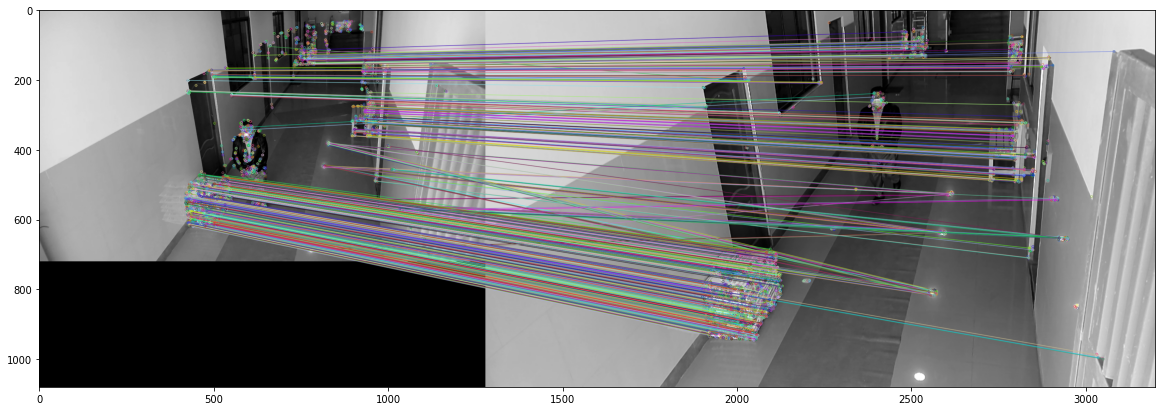

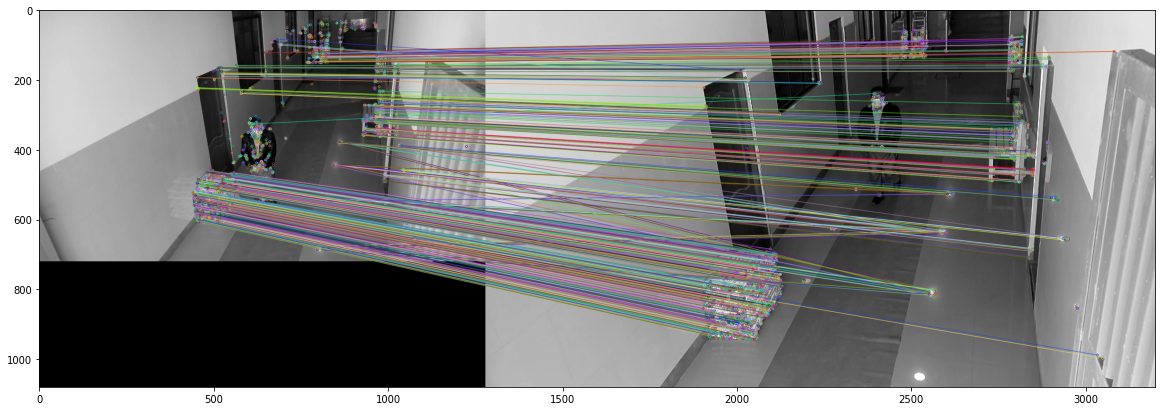

In [41]:
transformed1 = drawMatches(frames[0], frames[1], draw=True, warp=True)
transformed2 = drawMatches(frames[2], frames[1], draw=True, warp=True)

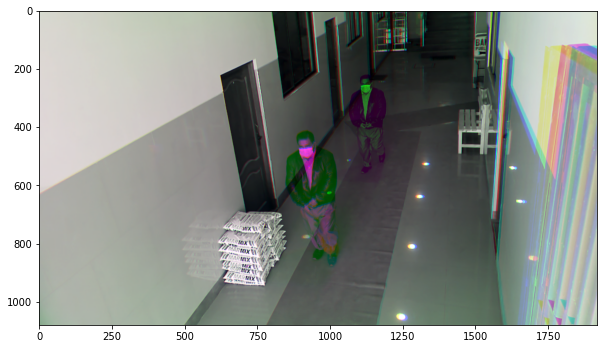

In [42]:
stacked = np.stack([transformed1,frames[1],transformed2], axis=2)
plt.figure(figsize=(10, 10))
plt.imshow(stacked)

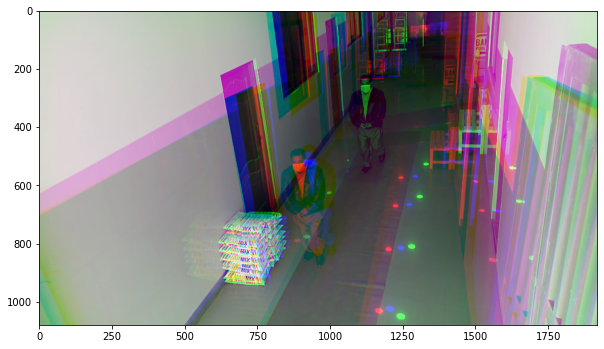

In [43]:
h, w = frames[1].shape
left = cv2.resize(frames[0], (w,h))
right = cv2.resize(frames[2], (w,h))

stacked = np.stack([left,frames[1],right], axis=2)
plt.figure(figsize=(10, 10))
plt.imshow(stacked)